In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import matplotlib.pyplot as plt
%matplotlib inline

import cv2
import numpy as np

import os
import sys

from models import BachNet
from utils import preprocessing_utils

Using TensorFlow backend.


In [2]:
bach = BachNet.BachNet()

In [3]:
train_path = "data/train/input/"
path_to_original_images = "original/"
path_to_gt_images = "gt/"

gt_tag = "gt"

receptive_field_shape = (12, 12)

In [4]:
print("Loading Images")

X = []
Y = []

files = os.listdir(train_path)

for i, filename in enumerate(files):
    
    sys.stdout.write("\rProgress: %.2f%% || %d/%d" % (i / len(files),
                                                      i,
                                                      len(files)))
    
    
    f_name, ext = os.path.splitext(filename)
    
    if gt_tag in f_name.split("_"):
        continue
        
    gt_filename = f_name + "_" + gt_tag
    
    gt_path = os.path.join(train_path, (gt_filename + ext))
        
    if not os.path.isfile(gt_path):
        continue
        
    foldername = "data/train/chopin/" + f_name
        
    image_path = os.path.join(train_path, filename)
        
    img = cv2.imread(image_path, 0)
    
    x = preprocessing_utils.prepare_input_images(img, width=receptive_field_shape[0],
                                                 height=receptive_field_shape[1])
    
    X.append(x)

    gt = cv2.imread(gt_path, 0)
    y = np.zeros_like(gt)
    y[gt == 255] = 1
    y = y.flatten()
    
    Y.append(y)
    
X = np.concatenate(X)
Y = np.concatenate(Y)

sys.stdout.write("\rProgress: Done! || %d/%d" % (len(files),
                                                len(files)))
sys.stdout.flush()

Loading Images
Progress: Done! || 98/98

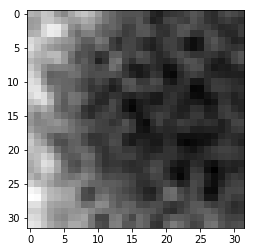

In [9]:
plt.imshow(img, cmap='gray')

In [10]:
print(X.shape, Y.shape)

(50176, 12, 12, 1) (50176,)


In [12]:
bach.build(receptive_field_shape, 1)

In [13]:
bach.model.fit(X, Y, batch_size=101, epochs=500)

Epoch 1/500
50176/50176 [==============================] - 1s - loss: 0.3597 - acc: 0.8603     
Epoch 2/500
50176/50176 [==============================] - 1s - loss: 0.2959 - acc: 0.8809     
Epoch 3/500
50176/50176 [==============================] - 1s - loss: 0.2816 - acc: 0.8873     
Epoch 4/500
50176/50176 [==============================] - 1s - loss: 0.2734 - acc: 0.8893     
Epoch 5/500
50176/50176 [==============================] - 1s - loss: 0.2635 - acc: 0.8936     
Epoch 6/500
50176/50176 [==============================] - 1s - loss: 0.2597 - acc: 0.8949     
Epoch 7/500
50176/50176 [==============================] - 1s - loss: 0.2543 - acc: 0.8968     
Epoch 8/500
50176/50176 [==============================] - 1s - loss: 0.2478 - acc: 0.9010     
Epoch 9/500
50176/50176 [==============================] - 1s - loss: 0.2444 - acc: 0.9009     
Epoch 10/500
50176/50176 [==============================] - 1s - loss: 0.2391 - acc: 0.9026     
Epoch 11/500
50176/50176 [=============

50176/50176 [==============================] - 1s - loss: 0.1193 - acc: 0.9455     
Epoch 86/500
50176/50176 [==============================] - 1s - loss: 0.1201 - acc: 0.9450     
Epoch 87/500
50176/50176 [==============================] - 1s - loss: 0.1183 - acc: 0.9453     
Epoch 88/500
50176/50176 [==============================] - 1s - loss: 0.1162 - acc: 0.9460     
Epoch 89/500
50176/50176 [==============================] - 1s - loss: 0.1223 - acc: 0.9429     
Epoch 90/500
50176/50176 [==============================] - 1s - loss: 0.1192 - acc: 0.9449     
Epoch 91/500
50176/50176 [==============================] - 1s - loss: 0.1209 - acc: 0.9439     
Epoch 92/500
50176/50176 [==============================] - 1s - loss: 0.1179 - acc: 0.9458     
Epoch 93/500
50176/50176 [==============================] - 1s - loss: 0.1187 - acc: 0.9455     
Epoch 94/500
50176/50176 [==============================] - 1s - loss: 0.1172 - acc: 0.9458     
Epoch 95/500
50176/50176 [=================

KeyboardInterrupt: 

In [14]:
bach.model.save("models/saved_models/Bach/model.h5")